In [374]:
!pip install numpy

In [375]:
!pip install matplotlib

In [376]:
!pip install seaborn

In [377]:
!pip install plotly

In [378]:
!pip install jovian

In [379]:
!pip install xgboost

In [380]:
!pip install sklearn

In [381]:
!pip install opendatasets

In [382]:
!pip install pandas

In [383]:
import os
import pandas as pd
import numpy as np
import opendatasets as od
import jovian

In [384]:
od.download('https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset')

Skipping, found downloaded files in ".\heart-disease-dataset" (use force=True to force download)


In [385]:
data_dir=r"C:\Users\SUMIT\airbnb-recruiting-new-user-bookings\heart-disease-dataset\heart.csv"

In [386]:
data_df=pd.read_csv(data_dir)

In [387]:
data_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [388]:
import matplotlib 
import matplotlib.pyplot as plt
import seaborn  as sns
import plotly.express as px

In [389]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

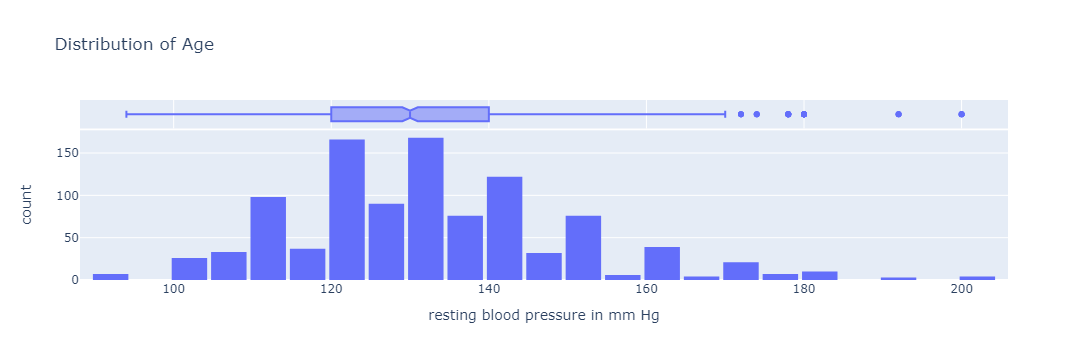

In [390]:
fig = px.histogram(data_df, 
                   x='trestbps', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age', labels={'trestbps': 'resting blood pressure in mm Hg'},)
fig.update_layout(bargap=0.1)
fig.show()

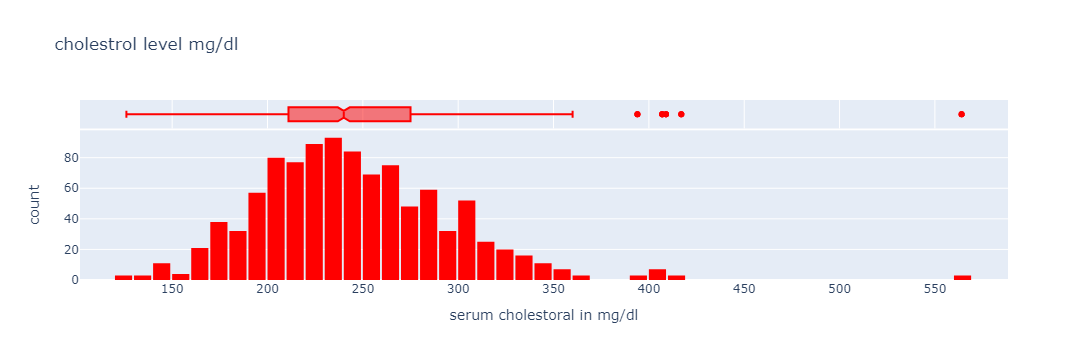

In [391]:
fig = px.histogram(data_df, 
                   x='chol', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title=' cholestrol level mg/dl',labels={"chol":"serum cholestoral in mg/dl"})
                         
fig.update_layout(bargap=0.1)
fig.show()

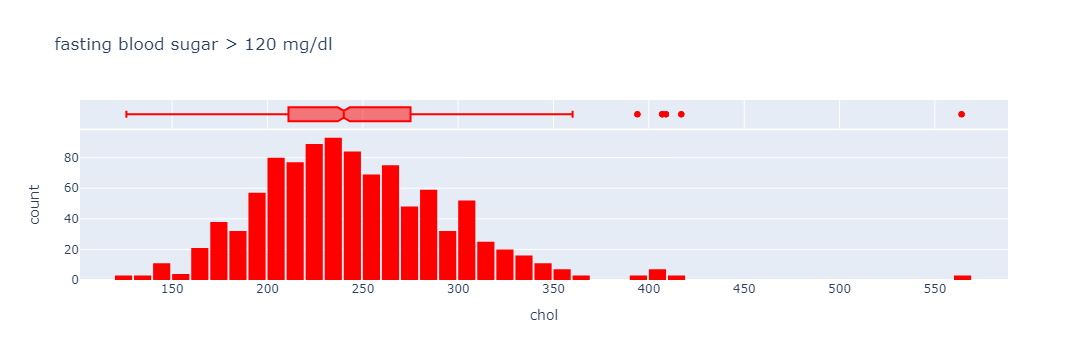

In [392]:
fig = px.histogram(data_df, 
                   x='chol', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='fasting blood sugar > 120 mg/dl')
fig.update_layout(bargap=0.1)
fig.show()

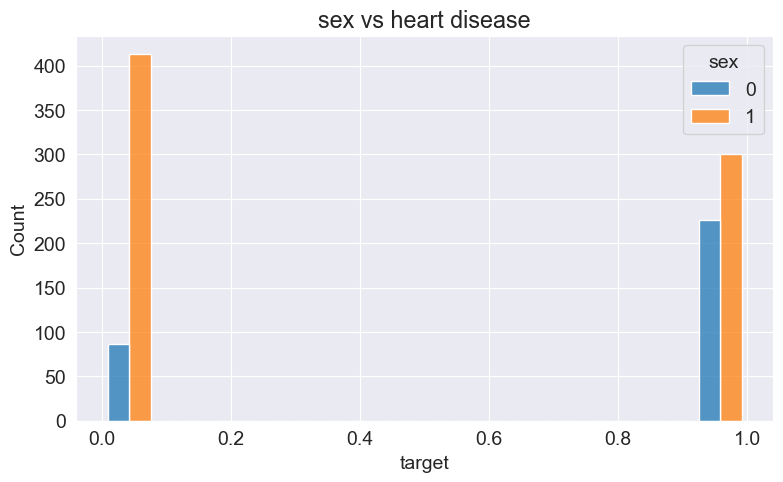

In [394]:
sns.histplot(data=data_df,x='target',hue='sex',multiple="dodge",shrink=.8);
plt.title('sex vs heart disease');




In [395]:
from sklearn.preprocessing import MinMaxScaler

In [396]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [397]:
numeric_cols=[]
categoric_cols=[]
for col in data_df.columns:
    if data_df[col].dtype=='object' and col!='target':
        categoric_cols.append(col)
    else:
        numeric_cols.append(col)
        

In [398]:
data_df['sex'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1025 entries, 0 to 1024
Series name: sex
Non-Null Count  Dtype
--------------  -----
1025 non-null   int64
dtypes: int64(1)
memory usage: 8.1 KB


In [399]:
numeric_cols

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [400]:
scaler=MinMaxScaler().fit(data_df[numeric_cols])
 

In [401]:
data_df[numeric_cols]=scaler.transform(data_df[numeric_cols])

In [402]:
data_df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667,1.0
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000,0.0
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667,0.0
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667,1.0


In [403]:
data_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667,1.0
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000,0.0
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667,0.0
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667,1.0


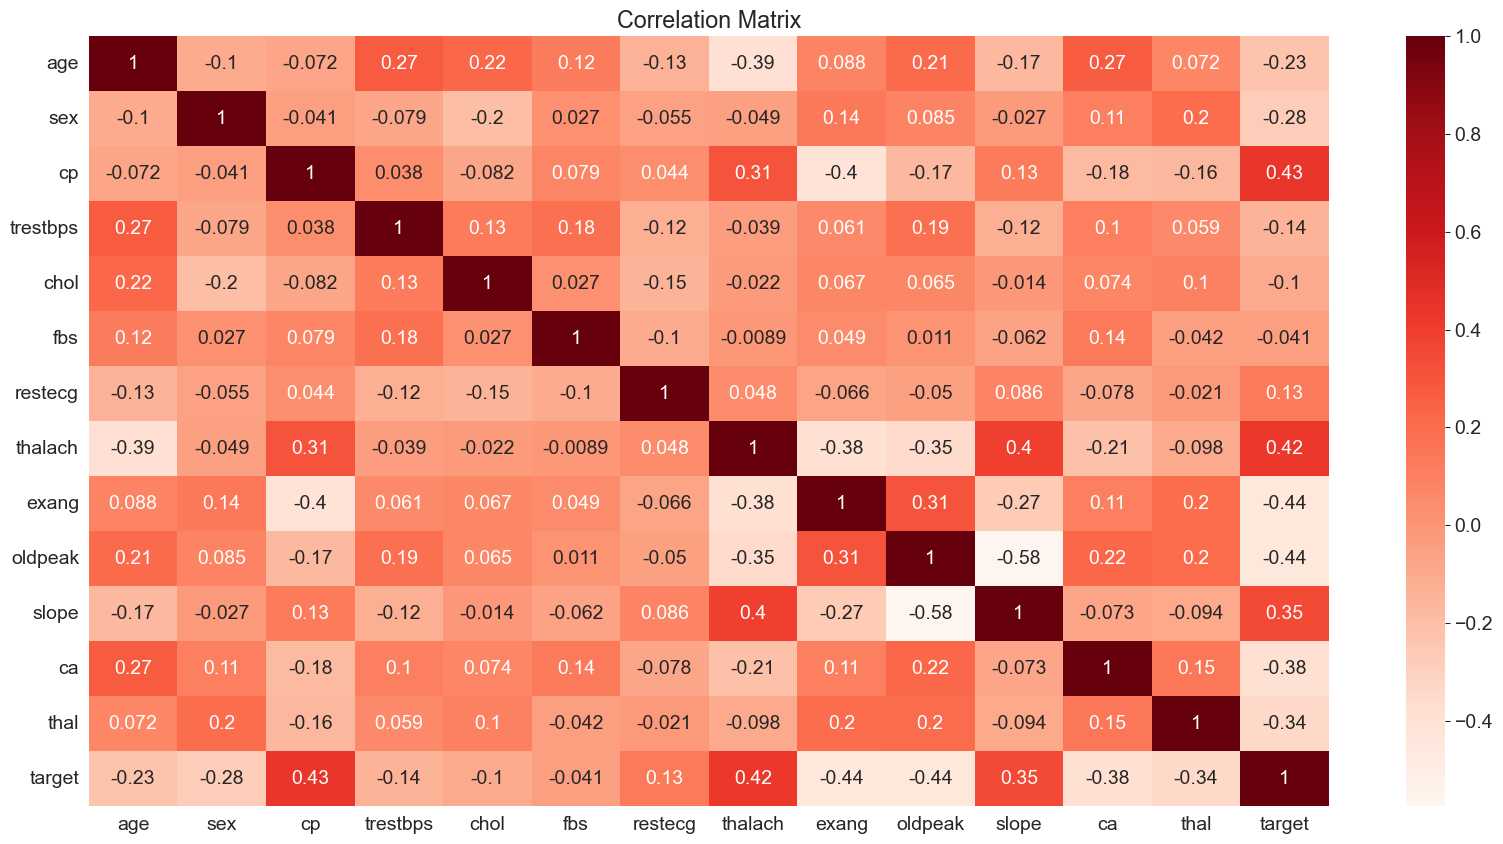

In [404]:
plt.figure(figsize=(20,10))
sns.heatmap(data_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [405]:
train_df=data_df.sample(frac=0.8,random_state=42)
val_df=train_df.sample(frac=0.3,random_state=42)
test_df=data_df.sample(frac=0.2,random_state=42)


In [406]:
train_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
527,0.687500,0.0,0.000000,0.283019,0.189498,0.0,0.5,0.702290,0.0,0.000000,1.0,0.00,0.666667,1.0
359,0.500000,0.0,0.666667,0.320755,0.205479,0.0,0.0,0.335878,0.0,0.000000,1.0,0.00,0.000000,1.0
447,0.541667,1.0,0.000000,0.622642,0.372146,0.0,0.0,0.564885,1.0,0.129032,0.5,0.25,1.000000,0.0
31,0.437500,0.0,0.333333,0.245283,0.269406,0.0,0.5,0.694656,0.0,0.177419,1.0,0.00,0.666667,1.0
621,0.395833,1.0,0.000000,0.339623,0.296804,1.0,0.0,0.603053,1.0,0.000000,1.0,0.50,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,0.520833,0.0,0.666667,0.386792,0.406393,1.0,0.5,0.755725,0.0,0.000000,1.0,0.00,0.666667,1.0
927,0.270833,1.0,0.666667,0.245283,0.260274,1.0,0.5,0.938931,0.0,0.129032,0.0,0.00,1.000000,1.0
619,0.750000,1.0,0.000000,0.150943,0.278539,0.0,0.0,0.664122,0.0,0.096774,1.0,0.50,0.333333,0.0
877,0.291667,0.0,0.666667,0.264151,0.198630,0.0,0.5,0.717557,0.0,0.032258,0.5,0.00,0.666667,1.0


In [407]:
val_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
157,0.520833,1.0,0.666667,0.245283,0.301370,0.0,0.0,0.580153,0.0,0.064516,0.5,0.00,1.000000,1.0
851,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
405,0.562500,1.0,0.666667,0.339623,0.296804,1.0,0.0,0.541985,1.0,0.096774,0.5,0.25,0.333333,0.0
720,0.729167,1.0,0.666667,0.433962,0.477169,0.0,0.5,0.664122,0.0,0.000000,1.0,0.00,0.666667,0.0
140,0.583333,1.0,0.000000,0.547170,0.337900,0.0,0.5,0.129771,1.0,0.193548,0.5,0.25,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.520833,1.0,0.333333,0.132075,0.417808,0.0,0.5,0.648855,0.0,0.000000,1.0,0.00,1.000000,1.0
286,0.729167,0.0,0.666667,0.433962,0.426941,0.0,0.5,0.473282,0.0,0.032258,1.0,0.00,1.000000,1.0
416,0.520833,1.0,0.666667,0.292453,0.335616,0.0,0.0,0.618321,0.0,0.080645,0.0,0.25,0.666667,1.0
210,0.270833,1.0,0.666667,0.245283,0.260274,1.0,0.5,0.938931,0.0,0.129032,0.0,0.00,1.000000,1.0


In [408]:
train_target=pd.DataFrame()
val_target= pd.DataFrame()
test_target=pd.DataFrame()
train_target['target']=train_df['target'].copy()
val_target['target']=val_df['target'].copy()
test_target['target']=test_df['target'].copy()


In [409]:
test_target

,target
527,1.0
359,1.0
447,0.0
31,1.0
621,0.0
...,...
832,1.0
796,1.0
644,1.0
404,0.0


In [410]:
val_target

,target
157,1.0
851,1.0
405,0.0
720,0.0
140,0.0
...,...
102,1.0
286,1.0
416,1.0
210,1.0


In [411]:
train_df=train_df.drop(['target'],axis=1).copy()
test_df=test_df.drop(['target'],axis=1).copy()
val_df=val_df.drop(['target'],axis=1).copy()

In [412]:
from xgboost.sklearn import XGBClassifier

In [413]:

model =XGBClassifier(max_depth=7, learning_rate=0.3, n_estimators=10,n_jobs=-1)

In [414]:
%%time
model.fit(train_df,train_target)

Wall time: 11 ms


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [415]:
pred = model.predict(train_df) 

In [416]:
pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,

In [417]:
train_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [418]:
model.feature_importances_

array([0.04112748, 0.06922967, 0.23746623, 0.02150701, 0.03295804,
       0.02543816, 0.0370451 , 0.03700246, 0.07088964, 0.04017086,
       0.03589273, 0.11651684, 0.23475583], dtype=float32)

In [419]:
importance_df = pd.DataFrame({
    'feature': train_df.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [420]:
importance_df

,feature,importance
2,cp,0.237466
12,thal,0.234756
11,ca,0.116517
8,exang,0.070890
1,sex,0.069230
0,age,0.041127
9,oldpeak,0.040171
6,restecg,0.037045
7,thalach,0.037002
10,slope,0.035893


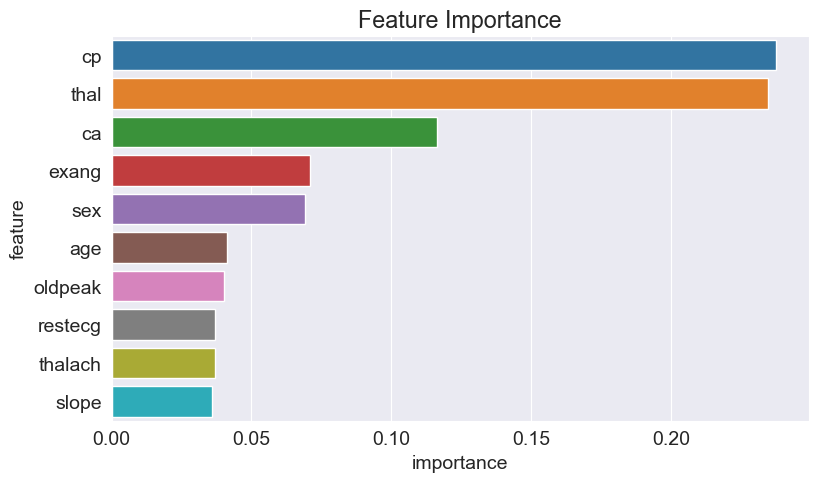

In [424]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [421]:
model.score(train_df,train_target)

0.9939024390243902

In [422]:
model.score(val_df,val_target)

0.9878048780487805

In [423]:
model.score(test_df,test_target)

0.9853658536585366